## 문제 있는 데이터 패턴
### 데이터가 변수 간의 평균/분산 값의 차이가 크다
### 데이터의 규모가 크게 차이남

In [1]:
%autosave 0
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import load_model

from tensorflow.keras.callbacks import EarlyStopping

Autosave disabled


In [2]:
# 데이터 준비
data = np.loadtxt('./country1.csv', delimiter=',', dtype=np.float64)
print(type(data))
print(data.shape)
print(data[:10])

<class 'numpy.ndarray'>
(100, 7)
[[0.e+00 0.e+00 0.e+00 5.e+00 1.e+00 0.e+00 0.e+00]
 [1.e+00 0.e+00 1.e+00 6.e+00 1.e+00 0.e+00 1.e+00]
 [1.e+00 1.e+00 1.e+00 1.e+01 1.e+00 0.e+00 1.e+00]
 [0.e+00 0.e+00 0.e+00 1.e+01 1.e+00 0.e+00 0.e+00]
 [1.e+00 0.e+00 1.e+00 1.e+01 1.e+00 2.e+03 1.e+00]
 [1.e+00 0.e+00 0.e+00 0.e+00 0.e+00 1.e+03 0.e+00]
 [0.e+00 0.e+00 0.e+00 5.e+00 1.e+00 0.e+00 0.e+00]
 [1.e+00 0.e+00 1.e+00 6.e+00 1.e+00 0.e+00 1.e+00]
 [1.e+00 1.e+00 1.e+00 1.e+01 1.e+00 3.e+03 1.e+00]
 [1.e+00 0.e+00 1.e+00 2.e+00 1.e+00 1.e+03 0.e+00]]


In [3]:
# 훈련용 + 검증용: 90 건
x_train = data[0:90, 0:6] # 변수 6개, 0 ~ 5
print(x_train.shape)
y_train = data[0:90, 6] # class 1개
print(y_train.shape)
# 테스트용: 10 건
x_test =data[90:, 0:6]  # 변수 6개, 0 ~ 5
print(x_test.shape)
y_test =data[90:, 6]    # class 1개
print(y_test.shape)

(90, 6)
(90,)
(10, 6)
(10,)


In [4]:
def country1():
    model = Sequential()
    # 최적의 모델
    model.add(Dense(30, input_dim=6, activation='relu')) # 입력 값: 17, 출력값: 64
    model.add(Dense(15, activation='relu'))
    model.add(Dense(1, activation='sigmoid')) 

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # 가장 작은 오차가 2번 발생하면 학습 자동 중지
    early_stopping = EarlyStopping(monitor='loss', patience=2)

    # validation_split = 0.2: 20% 검증 데이터로 사용
    hist = model.fit(x_train, y_train, validation_split = 0.2, 
                     shuffle=True, epochs=1000, 
                     batch_size=3, callbacks=[early_stopping])
    return model, hist

In [5]:
model, hist = country1()

Train on 72 samples, validate on 18 samples
Epoch 1/1000
72/72 [==============================] - 1s 12ms/sample - loss: 17.6944 - accuracy: 0.4722 - val_loss: 7.2126 - val_accuracy: 0.6667
Epoch 2/1000
72/72 [==============================] - 0s 681us/sample - loss: 6.1043 - accuracy: 0.5694 - val_loss: 4.2783 - val_accuracy: 0.3889
Epoch 3/1000
72/72 [==============================] - 0s 806us/sample - loss: 3.0665 - accuracy: 0.6389 - val_loss: 0.6564 - val_accuracy: 0.6111
Epoch 4/1000
72/72 [==============================] - 0s 764us/sample - loss: 2.4620 - accuracy: 0.7222 - val_loss: 1.2672 - val_accuracy: 0.5000
Epoch 5/1000
72/72 [==============================] - 0s 792us/sample - loss: 1.6860 - accuracy: 0.7083 - val_loss: 1.1196 - val_accuracy: 0.7778
Epoch 6/1000
72/72 [==============================] - 0s 584us/sample - loss: 1.4602 - accuracy: 0.6806 - val_loss: 1.4102 - val_accuracy: 0.7778
Epoch 7/1000
72/72 [==============================] - 0s 625us/sample - loss: 1.

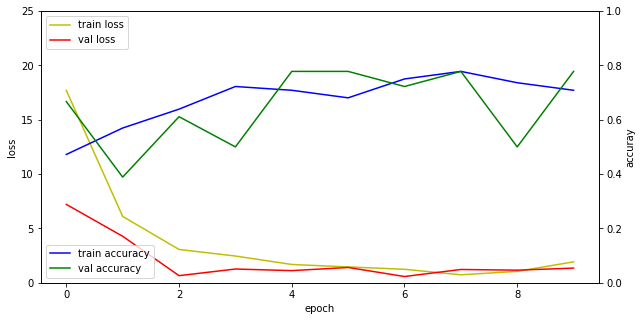

In [6]:
fig, loss_ax = plt.subplots()
# plt.figure(figsize=(6,4)) # ERROR
fig.set_size_inches(10, 5)  # 챠트 크기 설정

acc_ax = loss_ax.twinx()  # 오른쪽 y 출 설정

loss_ax.plot(hist.history['loss'], 'y', label='train loss')   # 훈련 손실
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss') # 검증 손실, 학습의 우수성 평가 척도
loss_ax.set_ylim([0.0, 25.0]) # 왼쪽 y 축, 값을 반영하여 변경

acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')   # 훈련 정확도
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val accuracy') # 검증 정확도
acc_ax.set_ylim([0.0, 1.0])  # 오른쪽 y 축, 0 ~100 %를 의미

loss_ax.set_xlabel('epoch')  # x축 레이블
loss_ax.set_ylabel('loss')     # 왼쪽 y 레이블
acc_ax.set_ylabel('accuray') # 오른쪽 y 레이블

loss_ax.legend(loc='upper left')  # 좌측 y 축 기준 범례 위치 설정
acc_ax.legend(loc='lower left')   # 우측 y 축 기준 범례 위치 설정

plt.show()


In [7]:
test_loss, test_acc = model.evaluate(x_test, y_test, batch_size=1, verbose=0)
print('손실값:', test_loss, '/정확도:', (test_acc*100), '%')

손실값: 1.5119034961917686 /정확도: 69.9999988079071 %
